In [1]:
# Step 1: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt

# Step 2: Load Dataset
file_path = "titanic.csv"   # adjust path if needed
df = pd.read_csv(file_path)

print("Original Shape:", df.shape)
print("Columns:", df.columns.tolist())
print(df.head())


Original Shape: (714, 8)
Columns: ['survived', 'pclass', 'name', 'sex', 'age', 'fare', 'sibsp', 'parch']
   survived  pclass                                               name  \
0         0       3                            Braund, Mr. Owen Harris   
1         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2         1       3                             Heikkinen, Miss. Laina   
3         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4         0       3                           Allen, Mr. William Henry   

      sex   age     fare  sibsp  parch  
0    male  22.0   7.2500      1      0  
1  female  38.0  71.2833      1      0  
2  female  26.0   7.9250      0      0  
3  female  35.0  53.1000      1      0  
4    male  35.0   8.0500      0      0  


In [2]:
# Step 3: Data Cleaning
# Fill missing values
df["age"] = df["age"].fillna(df["age"].median())
df["fare"] = df["fare"].fillna(df["fare"].median())

# Drop duplicates
df = df.drop_duplicates()

print("After cleaning shape:", df.shape)
print(df.isnull().sum())

After cleaning shape: (714, 8)
survived    0
pclass      0
name        0
sex         0
age         0
fare        0
sibsp       0
parch       0
dtype: int64


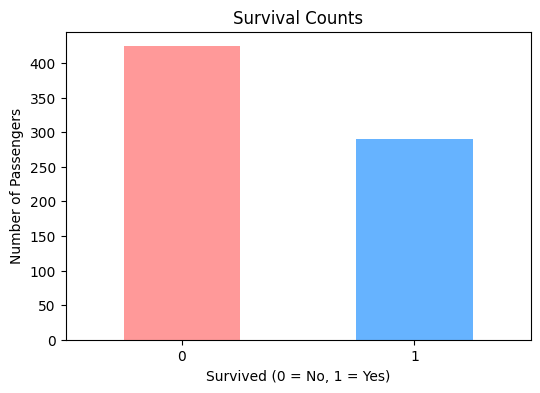

In [22]:
# Bar Chart → Survival Counts
survival_counts = df["survived"].value_counts()
plt.figure(figsize=(6,4))
survival_counts.plot(kind="bar", color=["#ff9999", "#66b3ff"])
plt.title("Survival Counts")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Number of Passengers")
plt.xticks(rotation=0)
plt.show()

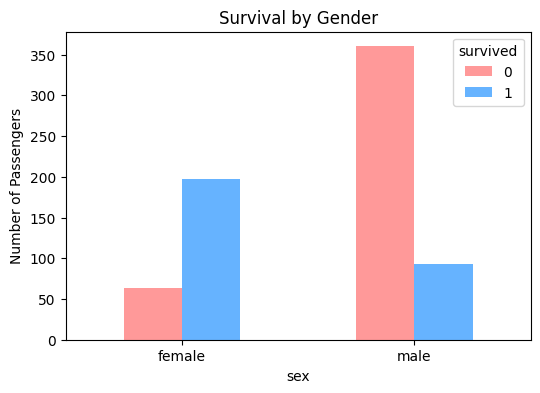

In [4]:
# Grouped Bar Chart → Survival by Gender
gender_survival = df.groupby("sex")["survived"].value_counts().unstack()
gender_survival.plot(kind="bar", stacked=False, figsize=(6,4),
                     color=["#ff9999", "#66b3ff"])
plt.title("Survival by Gender")
plt.ylabel("Number of Passengers")
plt.xticks(rotation=0)
plt.show()


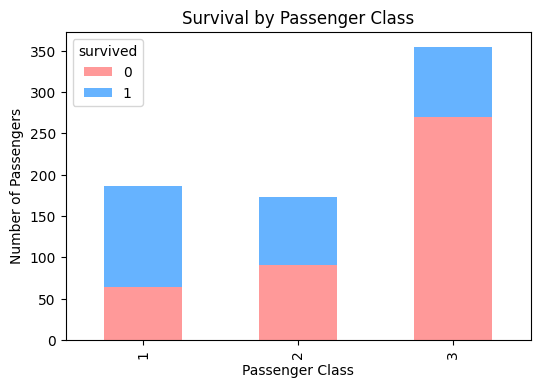

In [5]:
# Stacked Bar Chart → Survival by Passenger Class
class_survival = df.groupby("pclass")["survived"].value_counts().unstack()
class_survival.plot(kind="bar", stacked=True, figsize=(6,4),
                    color=["#ff9999", "#66b3ff"])
plt.title("Survival by Passenger Class")
plt.ylabel("Number of Passengers")
plt.xlabel("Passenger Class")
plt.show()

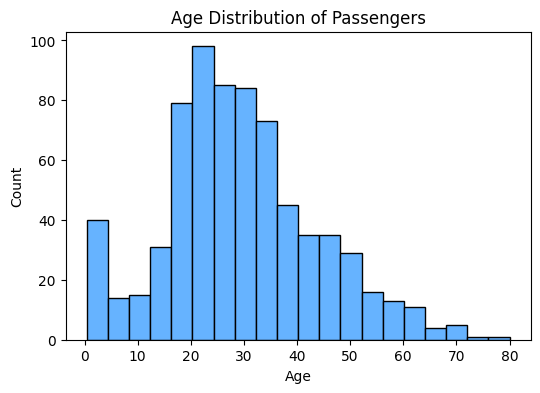

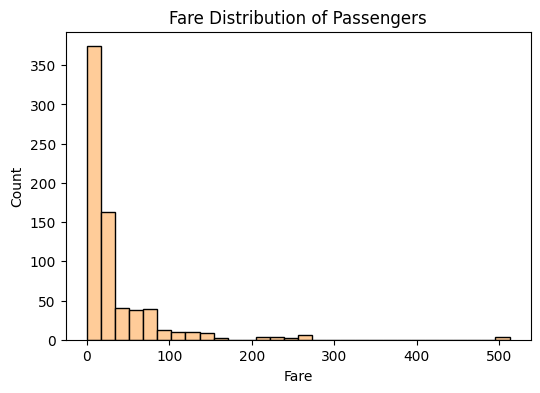

In [8]:
# Histogram → Age Distribution
plt.figure(figsize=(6,4))
plt.hist(df["age"], bins=20, color="#66b3ff", edgecolor="black")
plt.title("Age Distribution of Passengers")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()
# Fare Distribution
plt.figure(figsize=(6,4))
plt.hist(df["fare"], bins=30, color="#ffcc99", edgecolor="black")
plt.title("Fare Distribution of Passengers")
plt.xlabel("Fare")
plt.ylabel("Count")
plt.show()


<Figure size 600x400 with 0 Axes>

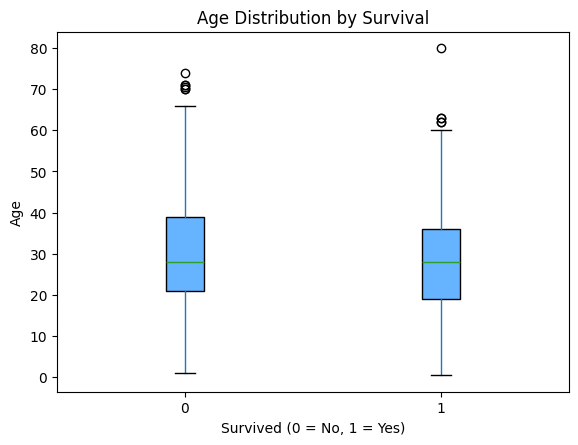

In [7]:
# Boxplot → Age vs Survival
plt.figure(figsize=(6,4))
df.boxplot(column="age", by="survived", grid=False,
           patch_artist=True, boxprops=dict(facecolor="#66b3ff"))
plt.title("Age Distribution by Survival")
plt.suptitle("")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Age")
plt.show()

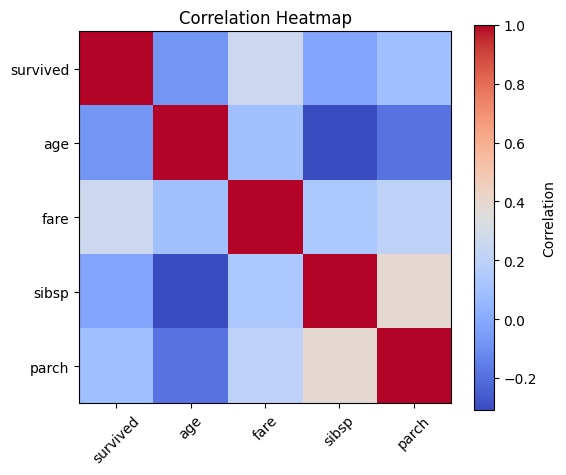

In [13]:
# Heatmap → Correlation Matrix
numeric_cols = ["survived", "age", "fare", "sibsp", "parch"]
corr = df[numeric_cols].corr()

plt.figure(figsize=(6,5))
plt.imshow(corr, cmap="coolwarm", interpolation="nearest")
plt.colorbar(label="Correlation")
plt.xticks(range(len(corr)), corr.columns, rotation=45)
plt.yticks(range(len(corr)), corr.columns)
plt.title("Correlation Heatmap")
plt.show()

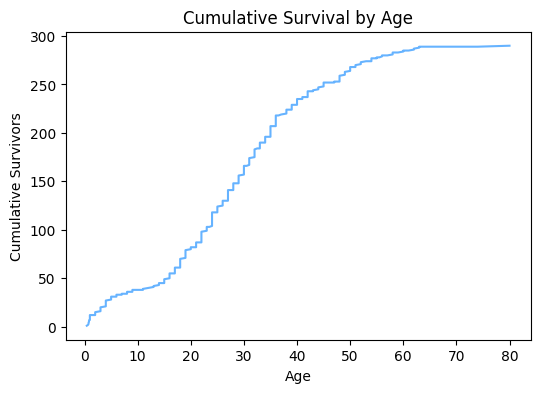

In [19]:
# Line Plot → Cumulative Survival Count
df_sorted = df.sort_values("age")
cum_survival = df_sorted["survived"].cumsum()

plt.figure(figsize=(6,4))
plt.plot(df_sorted["age"], cum_survival, color="#66b3ff")
plt.title("Cumulative Survival by Age")
plt.xlabel("Age")
plt.ylabel("Cumulative Survivors")
plt.show()

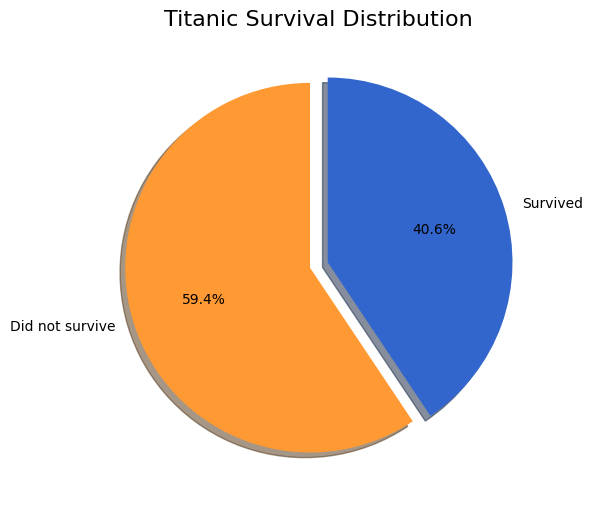

In [25]:
# Pie Chart  → Titanic Survival Distribution
plt.figure(figsize=(6,6))
colors = ["#ff9933","#3366cc"]  # Define colors
plt.pie(
    survival_counts,
    labels=['Did not survive', 'Survived'],
    autopct='%1.1f%%',
    colors=colors,
    startangle=90,
    explode=(0.05, 0.05),
    shadow=True)
plt.title("Titanic Survival Distribution", fontsize=16)
plt.show()